# Cross Validated CNN Model Without Contamination Using K-Folds

In [105]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import GroupKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
# Config
img_height = 288
img_width = 512
batch_size = 32
n_splits = 5

# File paths
# Get the project root directory
# Try to find project root by looking for "Scanpaths" folder
current_dir = os.getcwd()
project_root = current_dir

# Navigate up to find project root (where "Scanpaths" exists)
for _ in range(3):  # Check up to 3 levels up
    if os.path.exists(os.path.join(current_dir, "Scanpaths")):
        project_root = current_dir
        break
    parent = os.path.dirname(current_dir)
    if parent == current_dir:  # Reached filesystem root
        break
    current_dir = parent

# Dataset path: Scanpaths/cross_validation (at project root)
data_dir = os.path.join(project_root, "Scanpaths", "cross_validation")

# Print path for verification
print(f"Project root: {project_root}")
print(f"Data directory: {data_dir}")

# Extract image paths, labels, and group IDs (user IDs)
image_paths, labels, groups = [], [], []

In [107]:
# Iterate over "literate" and "illiterate" folders
for label_dir in os.listdir(data_dir):
    label_path = os.path.join(data_dir, label_dir)
    if not os.path.isdir(label_path):
        continue
    label = 1 if label_dir == "literate" else 0

    # Iterate over user folders
    for user_folder in os.listdir(label_path):
        user_path = os.path.join(label_path, user_folder)

        # Iterate over question files
        for filename in os.listdir(user_path):
            image_paths.append(os.path.join(user_path, filename))
            labels.append(label)
            groups.append(user_folder)  # Each user's folder name as group

In [108]:
def preprocess(paths, labels, batch_size=32):
    imgs = []
    for path in paths:
        img = load_img(path, target_size=(img_height, img_width))
        img = img_to_array(img)
        imgs.append(img)

    ds = tf.data.Dataset.from_tensor_slices((np.array(imgs), np.array(labels)))
    ds = ds.shuffle(buffer_size=len(labels))
    ds = ds.batch(batch_size)
    return ds


In [109]:
def create_model():
    model = models.Sequential([
        layers.Input(shape=(img_height, img_width, 3)),
        layers.Rescaling(1./255),

        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        # layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


🔁 Fold 1 --------------------
Class weights for Fold 1: {0: 0.8004005340453939, 1: 1.3322222222222222}
Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 46s 878ms/step - accuracy: 0.5246 - loss: 3.2240 - val_accuracy: 0.6400 - val_loss: 0.6975
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 34s 872ms/step - accuracy: 0.6568 - loss: 0.6015 - val_accuracy: 0.4400 - val_loss: 1.1927
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 32s 851ms/step - accuracy: 0.8487 - loss: 0.3767 - val_accuracy: 0.4033 - val_loss: 1.8245
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 32s 838ms/step - accuracy: 0.9238 - loss: 0.1924 - val_accuracy: 0.4167 - val_loss: 2.1338
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 32s 830ms/step - accuracy: 0.9506 - loss: 0.1246 - val_accuracy: 0.4233 - val_loss: 3.8450
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 827ms/step - accuracy: 0.9829 - loss: 0.0605 - val_accuracy: 0.4067 - val_loss: 4.6978
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 945ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━

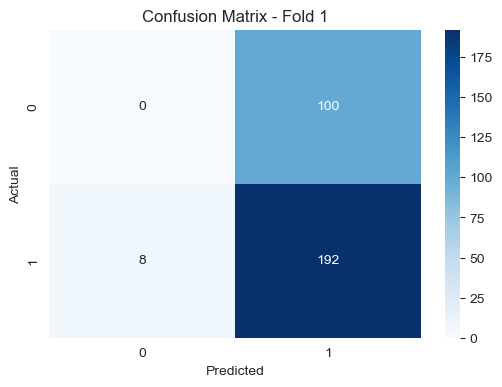

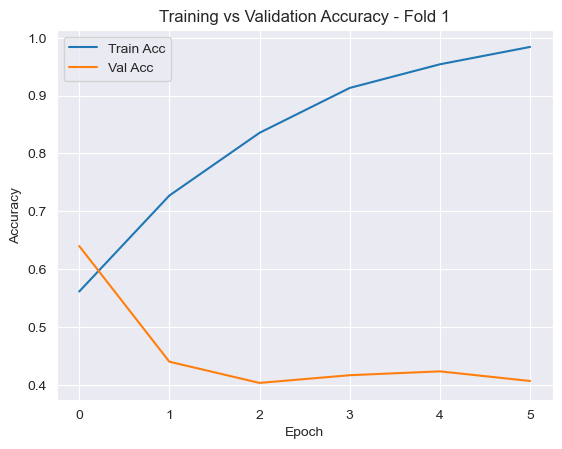

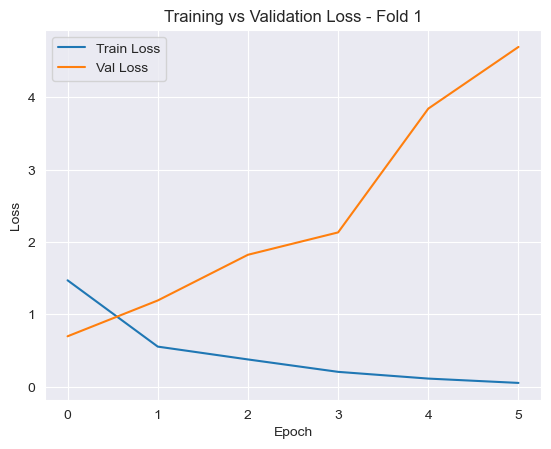


🔁 Fold 2 --------------------
Class weights for Fold 2: {0: 1.0008347245409015, 1: 0.9991666666666666}
Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 43s 840ms/step - accuracy: 0.5051 - loss: 2.0604 - val_accuracy: 0.8333 - val_loss: 0.5783
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 825ms/step - accuracy: 0.6561 - loss: 0.6502 - val_accuracy: 0.6867 - val_loss: 0.5883
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 30s 800ms/step - accuracy: 0.8028 - loss: 0.4202 - val_accuracy: 0.7433 - val_loss: 0.4684
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 30s 798ms/step - accuracy: 0.8926 - loss: 0.2604 - val_accuracy: 0.6633 - val_loss: 0.8845
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 30s 801ms/step - accuracy: 0.9397 - loss: 0.1577 - val_accuracy: 0.7367 - val_loss: 0.8582
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 33s 868ms/step - accuracy: 0.9774 - loss: 0.0576 - val_accuracy: 0.7533 - val_loss: 0.8202
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━

C:\Users\tonyg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tonyg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tonyg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


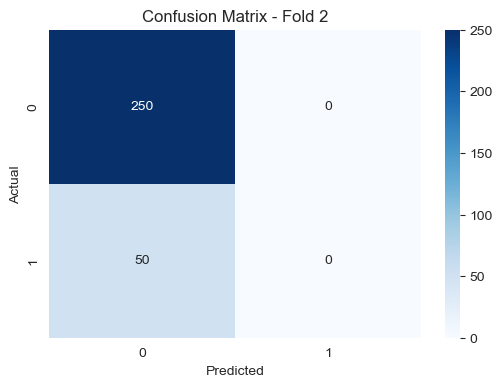

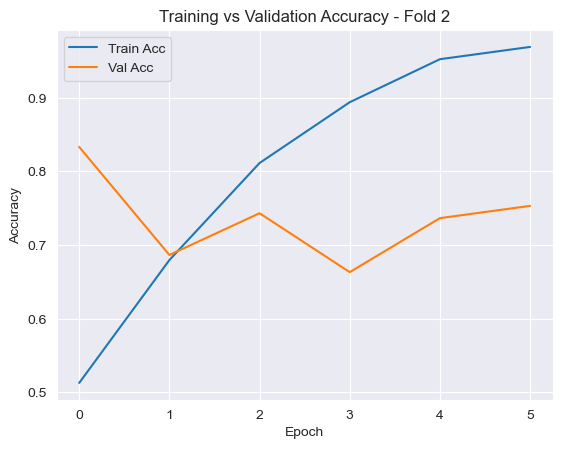

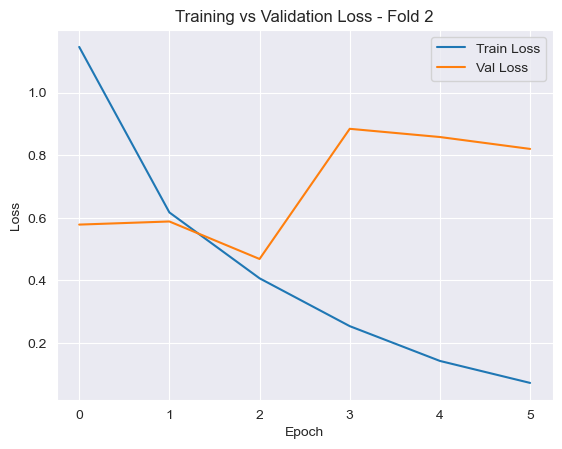


🔁 Fold 3 --------------------
Class weights for Fold 3: {0: 0.8004005340453939, 1: 1.3322222222222222}
Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 46s 870ms/step - accuracy: 0.5122 - loss: 2.7889 - val_accuracy: 0.6667 - val_loss: 0.6815
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 811ms/step - accuracy: 0.5771 - loss: 0.6979 - val_accuracy: 0.5100 - val_loss: 0.7023
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 30s 789ms/step - accuracy: 0.7553 - loss: 0.5027 - val_accuracy: 0.4767 - val_loss: 0.8356
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 30s 790ms/step - accuracy: 0.8706 - loss: 0.3463 - val_accuracy: 0.5600 - val_loss: 0.9409
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 30s 801ms/step - accuracy: 0.9138 - loss: 0.1922 - val_accuracy: 0.5900 - val_loss: 1.1226
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 30s 786ms/step - accuracy: 0.9488 - loss: 0.1197 - val_accuracy: 0.5400 - val_loss: 1.7252
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━

C:\Users\tonyg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tonyg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tonyg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


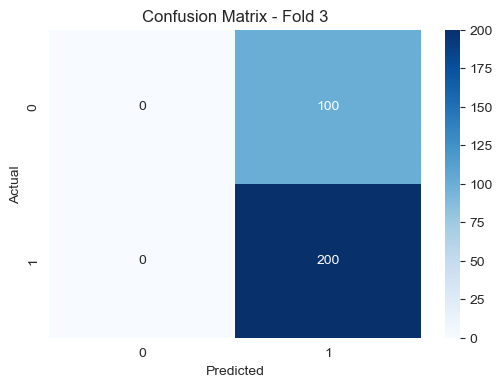

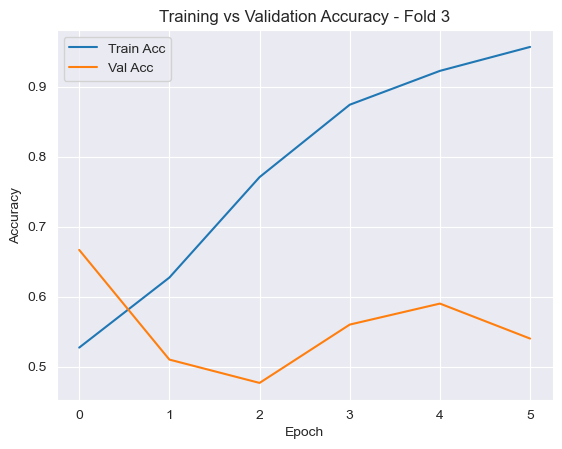

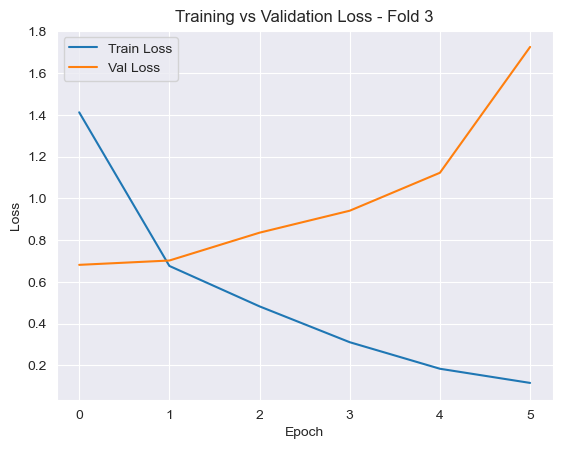


🔁 Fold 4 --------------------
Class weights for Fold 4: {0: 0.923728813559322, 1: 1.09}
Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 860ms/step - accuracy: 0.4968 - loss: 4.5263 - val_accuracy: 0.4267 - val_loss: 0.6935
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 32s 841ms/step - accuracy: 0.5454 - loss: 0.6958 - val_accuracy: 0.2633 - val_loss: 0.7129
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 805ms/step - accuracy: 0.5983 - loss: 0.6809 - val_accuracy: 0.4133 - val_loss: 0.8915
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 32s 849ms/step - accuracy: 0.6235 - loss: 0.7992 - val_accuracy: 0.2433 - val_loss: 1.1702
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 32s 838ms/step - accuracy: 0.7462 - loss: 0.5021 - val_accuracy: 0.4767 - val_loss: 1.4604
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 806ms/step - accuracy: 0.8836 - loss: 0.3118 - val_accuracy: 0.4967 - val_loss: 1.6568
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 800ms/step - accuracy: 0.9035 - loss: 0.2402 - val_accuracy: 0.4767 - val_loss: 3.0634
Epoch 8/

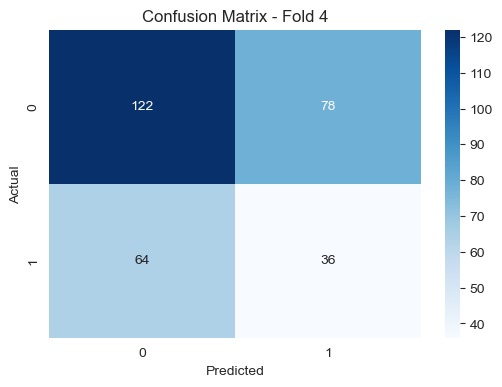

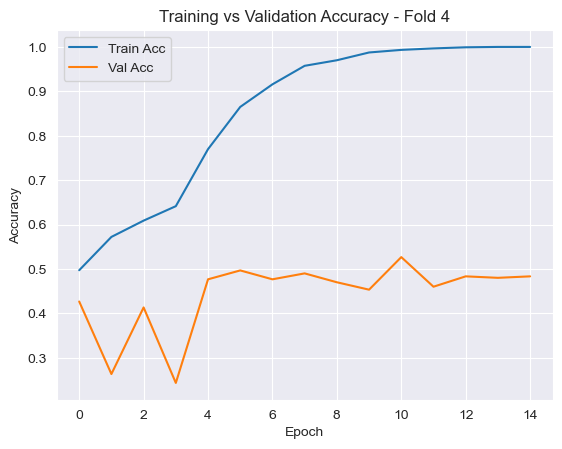

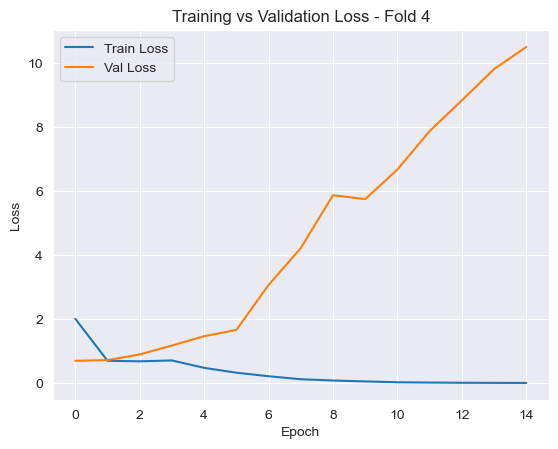


🔁 Fold 5 --------------------
Class weights for Fold 5: {0: 0.9230769230769231, 1: 1.0909090909090908}
Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 44s 885ms/step - accuracy: 0.5180 - loss: 1.9830 - val_accuracy: 0.6589 - val_loss: 0.6216
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 828ms/step - accuracy: 0.6521 - loss: 0.6371 - val_accuracy: 0.5585 - val_loss: 0.7787
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 34s 888ms/step - accuracy: 0.8089 - loss: 0.4476 - val_accuracy: 0.4849 - val_loss: 1.1021
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 32s 832ms/step - accuracy: 0.8613 - loss: 0.3285 - val_accuracy: 0.5652 - val_loss: 0.8057
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 32s 843ms/step - accuracy: 0.8982 - loss: 0.2667 - val_accuracy: 0.5217 - val_loss: 1.1159
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 825ms/step - accuracy: 0.9317 - loss: 0.1872 - val_accuracy: 0.5518 - val_loss: 1.2879
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━

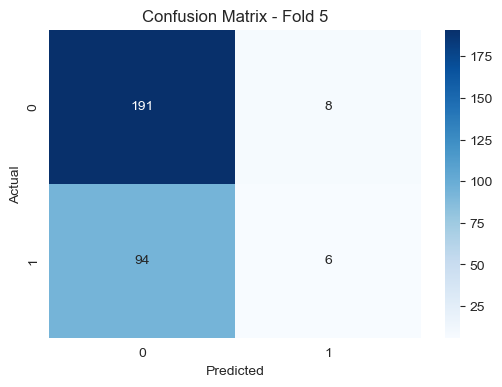

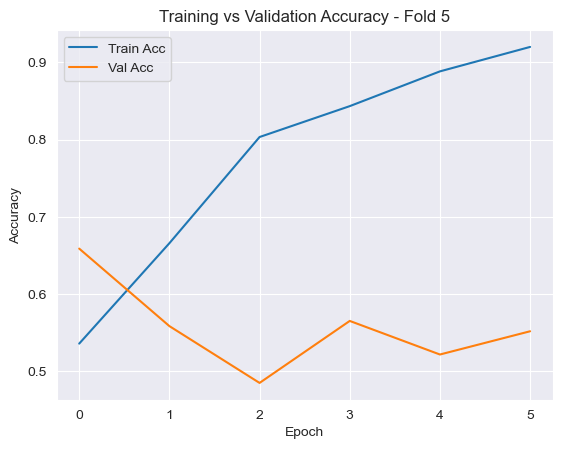

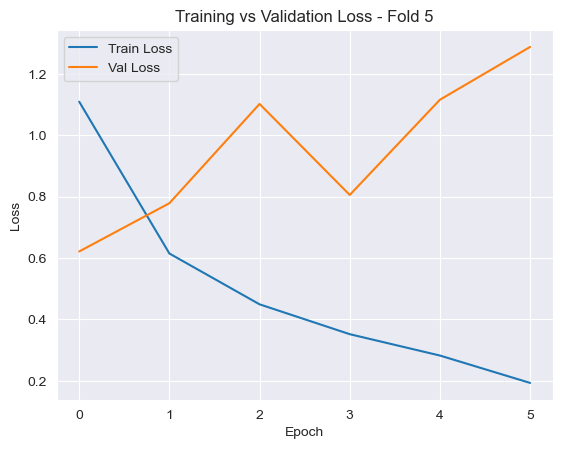

In [110]:
gkf = GroupKFold(n_splits=n_splits)

for fold, (train_idx, test_idx) in enumerate(gkf.split(image_paths, labels, groups)):
    print(f"\n🔁 Fold {fold + 1} --------------------")

    train_paths = [image_paths[i] for i in train_idx]
    test_paths = [image_paths[i] for i in test_idx]
    train_labels = [labels[i] for i in train_idx]
    test_labels = [labels[i] for i in test_idx]

    # Compute class weights
    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(train_labels),
        y=train_labels
    )
    class_weight_dict = dict(enumerate(class_weights))
    print(f"Class weights for Fold {fold+1}: {class_weight_dict}")

    train_ds = preprocess(train_paths, train_labels)
    test_ds = preprocess(test_paths, test_labels)

    model = create_model()

    early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

    history = model.fit(
        train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE),
        validation_data=test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE),
        epochs=15,
        callbacks=[early_stop],
        class_weight=class_weight_dict,
        verbose=1
    )

    # Evaluation
    y_true, y_pred = [], []
    for images, labels_batch in test_ds:
        preds = model.predict(images)
        y_true.extend(labels_batch.numpy())
        y_pred.extend(preds)

    y_pred_bin = [1 if p >= 0.5 else 0 for p in y_pred]
    print(classification_report(y_true, y_pred_bin))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred_bin)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - Fold {fold + 1}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot accuracy
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Training vs Validation Accuracy - Fold {fold + 1}')
    plt.legend()
    plt.show()

    # Plot loss
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training vs Validation Loss - Fold {fold + 1}')
    plt.legend()
    plt.show()
